In [6]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats

In [ ]:
categories = pd.read_excel("../Sheets/Tasks_and_Tags.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: '../Sheets/Tasks_Tags.xlsx'

In [ ]:
def calc_corr(dataPython,mode):
    human={}
    o1={}
    
    human_powermetrics={}
    o1_powermetrics={}
    
    
    for task in dataPython.keys():
        mean_energy=np.mean(dataPython[task]["human"]["Energy Linux"]).item()
        mean_energy_o1=np.mean(dataPython[task][mode]["Energy Linux"]).item()
        mean_energy_powermetrics=np.mean(dataPython[task]["human"]["Energy"]).item()
        mean_energy_powermetrics_o1=np.mean(dataPython[task][mode]["Energy"]).item()
        
        if mean_energy_o1>12 and not np.isnan(mean_energy_powermetrics_o1) and not np.isnan(mean_energy_powermetrics):
            o1[task]=mean_energy_o1
            human[task]=mean_energy
            o1_powermetrics[task]=mean_energy_powermetrics_o1
            human_powermetrics[task]=mean_energy_powermetrics
            
    all_tags={}
    all_tags_o1={}

    all_tags_powermetrics={}
    all_tags_o1_powermetrics={}

    for task in categories["Name "]:
        name=task.replace(" ","_")
        tags=categories[categories["Name "]==task]["Tags "].to_list()[0].split(",")
        for t in tags:
            if t.strip() not in all_tags.keys():
                all_tags[t.strip()]=[]
            if name in human.keys():
                all_tags[t.strip()].append(human[name])  
            if t.strip() not in all_tags_o1.keys():
                all_tags_o1[t.strip()]=[]
            if name in o1.keys():
                all_tags_o1[t.strip()].append(o1[name])
            
            if t.strip() not in all_tags_powermetrics.keys():
                all_tags_powermetrics[t.strip()]=[]
            if name in human_powermetrics.keys():
                all_tags_powermetrics[t.strip()].append(human_powermetrics[name])  
            if t.strip() not in all_tags_o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()]=[]
            if name in o1_powermetrics.keys():
                all_tags_o1_powermetrics[t.strip()].append(o1_powermetrics[name])
    
    ordered_human={k: v for k, v in sorted(human.items(), key=lambda item: item[1])}
    ordered_o1={k: v for k, v in sorted(o1.items(), key=lambda item: item[1])}

    ordered_human_powermetrics={k: v for k, v in sorted(human_powermetrics.items(), key=lambda item: item[1])}
    ordered_o1_powermetrics={k: v for k, v in sorted(o1_powermetrics.items(), key=lambda item: item[1])}
    
    count=0
    tags_graph=[]
    energy_graph=[]
    order_graph=[]
    for key in ordered_human.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_human[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph.append(tag.strip())
                energy_graph.append(ordered_human[key])
                order_graph.append(count)
            count+=1

    tags_energies={}
    for i in range(len(tags_graph)):
        if tags_graph[i] not in tags_energies.keys():
            tags_energies[tags_graph[i]]=[]
        tags_energies[tags_graph[i]].append(energy_graph[i])
    #temp_tags={}
    for k in tags_energies.keys():
        #new_name=k+" ["+str(len(tags_energies[k]))+"]"
        tags_energies[k]=np.mean(tags_energies[k]).item()
        #temp_tags[new_name]=np.mean(tags_energies[k]).item()
    #tags_energies=temp_tags
    tags_energies = dict(sorted(tags_energies.items()))

    count_pw=0
    tags_graph_pw=[]
    energy_graph_pw=[]
    order_graph_pw=[]
    for key in ordered_human_powermetrics.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_human_powermetrics[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_pw.append(tag.strip())
                energy_graph_pw.append(ordered_human_powermetrics[key])
                order_graph_pw.append(count_pw)
            count_pw+=1
    
    tags_energies_pw={}
    for i in range(len(tags_graph_pw)):
        if tags_graph_pw[i] not in tags_energies_pw.keys():
            tags_energies_pw[tags_graph_pw[i]]=[]
        tags_energies_pw[tags_graph_pw[i]].append(energy_graph_pw[i])
    #temp_tags={}
    for k in tags_energies_pw.keys():
        #new_name=k+" ["+str(len(tags_energies_pw[k]))+"]"
        tags_energies_pw[k]=np.mean(tags_energies_pw[k]).item()
        #temp_tags[new_name]=np.mean(tags_energies_pw[k]).item()
    #tags_energies_pw=temp_tags
    tags_energies_pw = dict(sorted(tags_energies_pw.items()))
    
    count_o1=0
    tags_graph_o1=[]
    energy_graph_o1=[]
    order_graph_o1=[]
    for key in ordered_o1.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_o1[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_o1.append(tag.strip())
                energy_graph_o1.append(ordered_o1[key])
                order_graph_o1.append(count_o1)
            count_o1+=1

    tags_energies_o1={}
    for i in range(len(tags_graph_o1)):
        if tags_graph_o1[i] not in tags_energies_o1.keys():
            tags_energies_o1[tags_graph_o1[i]]=[]
        tags_energies_o1[tags_graph_o1[i]].append(energy_graph_o1[i])
    #temp_tags={}
    for k in tags_energies_o1.keys():
        #new_name=k+" ["+str(len(tags_energies_o1[k]))+"]"
        tags_energies_o1[k]=np.mean(tags_energies_o1[k]).item()
        #temp_tags[new_name]=np.mean(tags_energies_o1[k]).item()
    
    #tags_energies_o1=temp_tags
    tags_energies_o1 = dict(sorted(tags_energies_o1.items()))

    count_o1_pw=0
    tags_graph_o1_pw=[]
    energy_graph_o1_pw=[]
    order_graph_o1_pw=[]
    for key in ordered_o1_powermetrics.keys():
        name=key.replace("_", " ")
        tags=categories[categories["Name "]==name]["Tags "].to_list()
        if len(tags)>0:
            #print(name+"\n Tags: "+",".join(tags)+". \n Energy: "+str(ordered_o1_powermetrics[key])+"\n")
            tags=tags[0].split(",")
            for tag in tags:
                tags_graph_o1_pw.append(tag.strip())
                energy_graph_o1_pw.append(ordered_o1_powermetrics[key])
                order_graph_o1_pw.append(count_o1_pw)
            count_o1_pw+=1
    
    tags_energies_o1_pw={}
    for i in range(len(tags_graph_o1_pw)):
        if tags_graph_o1_pw[i] not in tags_energies_o1_pw.keys():
            tags_energies_o1_pw[tags_graph_o1_pw[i]]=[]
        tags_energies_o1_pw[tags_graph_o1_pw[i]].append(energy_graph_o1_pw[i])
    #temp_tags={}
    for k in tags_energies_o1_pw.keys():
        #new_name=k+" ["+str(len(tags_energies_o1_pw[k]))+"]"
        tags_energies_o1_pw[k]=np.mean(tags_energies_o1_pw[k]).item()
        #temp_tags[new_name]=np.mean(tags_energies_o1_pw[k]).item()
    #tags_energies_o1_pw=temp_tags
    tags_energies_o1_pw = dict(sorted(tags_energies_o1_pw.items()))
    
    linux = stats.spearmanr(list(tags_energies.values()), list(tags_energies_o1.values()))
    print(len(tags_energies.keys()), len(tags_energies_o1.values()))
    
    mac = stats.spearmanr(list(tags_energies_pw.values()), list(tags_energies_o1_pw.values()))
    print(len(tags_energies_pw.keys()), len(tags_energies_o1_pw.values()))
    
    res = stats.spearmanr(list(tags_energies_o1_pw.values()), list(tags_energies_o1.values()))
    print(len(tags_energies_o1_pw.keys()), len(tags_energies_o1.values()))
    return (linux.statistic.item(), mac.statistic.item(), res.statistic.item())

In [ ]:
with open('../Results/resultsPython.json') as json_file:
    dataPython = json.load(json_file)

python={"human":[], "o1":[], "4o":[], "copilot":[]}
for model in python:
    python[model].append(calc_corr(dataPython, model))

with open('../Results/resultsJava.json') as json_file:
    dataJava = json.load(json_file)
java={"human":[], "o1":[], "4o":[], "copilot":[]}
for model in java:
    java[model].append(calc_corr(dataJava, model))
    
with open('../Results/resultsC.json') as json_file:
    dataC = json.load(json_file)
c={"human":[],"o1":[], "4o":[], "copilot":[]}
for model in c:
    c[model].append(calc_corr(dataC, model))


39 39
39 39
39 39
35 35
35 35
35 35
31 31
31 31
31 31
30 30
30 30
30 30
37 37
37 37
37 37
37 37
37 37
37 37
32 32
32 32
32 32
24 24
24 24
24 24
37 37
37 37
37 37
34 34
34 34
34 34
34 34
34 34
34 34
25 25
25 25
25 25


/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lolasolovyeva/PycharmProjects/GSD/.venv/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
python

{'human': [(1.0, 1.0, 0.987040599372279)],
 'o1': [(0.639904721871935, 0.7483536499929944, 0.985147821213395)],
 '4o': [(-0.2775312626058895, -0.25736183945139174, 0.9854780153287618)],
 'copilot': [(-0.12708657912308038, -0.09147562875584245, 0.9848653460939241)]}

In [ ]:
java

{'human': [(1.0, 1.0, 0.9428232502965598)],
 'o1': [(0.5073634204275534, 0.4814726840855107, 0.9684085510688837)],
 '4o': [(0.2777981651376146, 0.4697247706422018, 0.9504587155963301)],
 'copilot': [(0.27090592334494773, 0.47909407665505227, 0.9843205574912893)]}

In [ ]:
c

{'human': [(1.0, 1.0, 0.4606901458555674)],
 'o1': [(0.3275229357798165, 0.4669724770642202, 0.9067278287461773)],
 '4o': [(0.303935078854693, 0.020976879497779814, 0.8925126320624712)],
 'copilot': [(-0.15696104897801774, 0.3490165831083687, 0.8395680678750483)]}

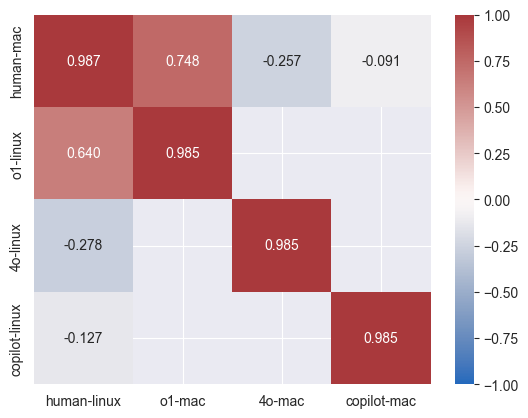

In [ ]:
df_python={"human_Mac":[], "o1":[], "4o":[], "copilot":[]}
for key in df_python:
    if key=="human_Mac":
        df_python[key].append(python["human"][0][2])
        df_python[key].append(python["o1"][0][1])
        df_python[key].append(python["4o"][0][1])
        df_python[key].append(python["copilot"][0][1])
    elif key=="o1":
        df_python[key].append(python[key][0][0])
        df_python[key].append(python[key][0][2])
        df_python[key].append(np.nan)
        df_python[key].append(np.nan)
    elif key=="4o":
        df_python[key].append(python[key][0][0])
        df_python[key].append(np.nan)
        df_python[key].append(python[key][0][2])
        df_python[key].append(np.nan)
    elif key=="copilot":
        df_python[key].append(python[key][0][0])
        df_python[key].append(np.nan)
        df_python[key].append(np.nan)
        df_python[key].append(python[key][0][2])

df_python = pd.DataFrame(data=df_python)
svm=sns.heatmap(data=df_python.T, xticklabels=["human-linux", "o1-mac", "4o-mac", "copilot-mac"], yticklabels=["human-mac", "o1-linux", "4o-linux", "copilot-linux"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)

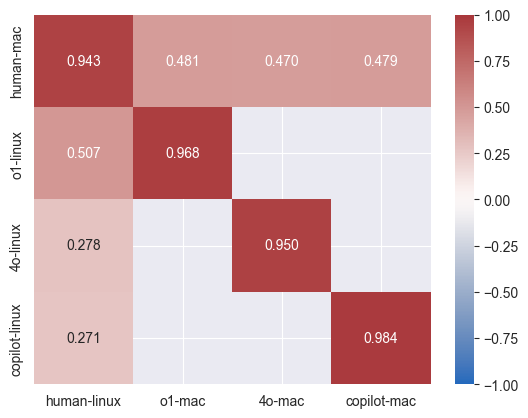

In [ ]:
df_java={"human_Mac":[], "o1":[], "4o":[], "copilot":[]}
for key in df_java:
    if key=="human_Mac":
        df_java[key].append(java["human"][0][2])
        df_java[key].append(java["o1"][0][1])
        df_java[key].append(java["4o"][0][1])
        df_java[key].append(java["copilot"][0][1])
    elif key=="o1":
        df_java[key].append(java[key][0][0])
        df_java[key].append(java[key][0][2])
        df_java[key].append(np.nan)
        df_java[key].append(np.nan)
    elif key=="4o":
        df_java[key].append(java[key][0][0])
        df_java[key].append(np.nan)
        df_java[key].append(java[key][0][2])
        df_java[key].append(np.nan)
    elif key=="copilot":
        df_java[key].append(java[key][0][0])
        df_java[key].append(np.nan)
        df_java[key].append(np.nan)
        df_java[key].append(java[key][0][2])

df_java = pd.DataFrame(data=df_java)
svm=sns.heatmap(data=df_java.T, xticklabels=["human-linux", "o1-mac", "4o-mac", "copilot-mac"], yticklabels=["human-mac", "o1-linux", "4o-linux", "copilot-linux"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)

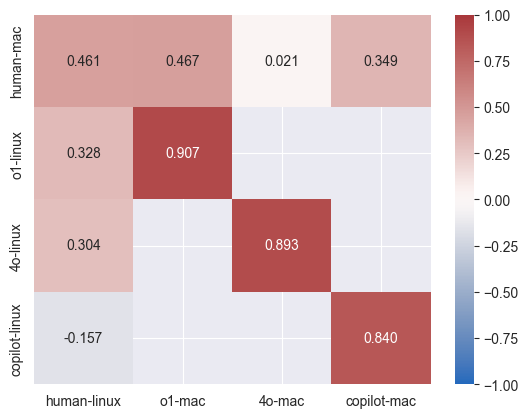

In [ ]:
df_c={"human_Mac":[], "o1":[], "4o":[], "copilot":[]}
for key in df_c:
    if key=="human_Mac":
        df_c[key].append(c["human"][0][2])
        df_c[key].append(c["o1"][0][1])
        df_c[key].append(c["4o"][0][1])
        df_c[key].append(c["copilot"][0][1])
    elif key=="o1":
        df_c[key].append(c[key][0][0])
        df_c[key].append(c[key][0][2])
        df_c[key].append(np.nan)
        df_c[key].append(np.nan)
    elif key=="4o":
        df_c[key].append(c[key][0][0])
        df_c[key].append(np.nan)
        df_c[key].append(c[key][0][2])
        df_c[key].append(np.nan)
    elif key=="copilot":
        df_c[key].append(c[key][0][0])
        df_c[key].append(np.nan)
        df_c[key].append(np.nan)
        df_c[key].append(c[key][0][2])

df_c = pd.DataFrame(data=df_c)
svm=sns.heatmap(data=df_c.T, xticklabels=["human-linux", "o1-mac", "4o-mac", "copilot-mac"], yticklabels=["human-mac", "o1-linux", "4o-linux", "copilot-linux"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)

NameError: name 'sns' is not defined

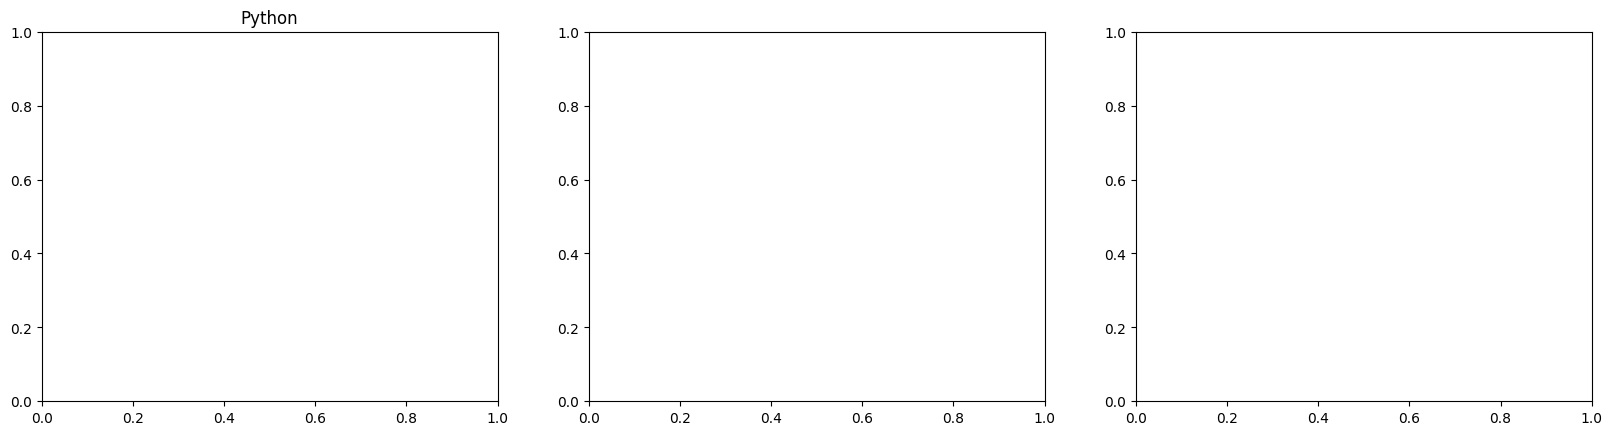

In [ ]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3)
fig.set_figwidth(20)
axes[0].set_title("Python")
sns.heatmap(ax=axes[0], data=df_python.T, xticklabels=["human-Ubuntu", "o1-macOS", "4o-macOS", "copilot-macOS"], yticklabels=["human-macOS", "o1-Ubuntu", "4o-Ubuntu", "copilot-Ubuntu"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)
axes[1].set_title("Java")
sns.heatmap(ax=axes[1], data=df_java.T, xticklabels=["human-Ubuntu", "o1-macOS", "4o-macOS", "copilot-macOS"], yticklabels=["human-macOS", "o1-Ubuntu", "4o-Ubuntu", "copilot-Ubuntu"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)
axes[2].set_title("C++")
sns.heatmap(ax=axes[2], data=df_c.T, xticklabels=["human-Ubuntu", "o1-macOS", "4o-macOS", "copilot-macOS"], yticklabels=["human-macOS", "o1-Ubuntu", "4o-Ubuntu", "copilot-Ubuntu"], annot=True, fmt=".3f", cmap="vlag", vmin=-1, vmax=1)
fig.savefig("correlation.png", bbox_inches="tight", dpi=500)
